<a href="https://colab.research.google.com/github/busrasencan/NLP-COVID19/blob/master/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLP** (NATURAL LANGUAGE PROCESSİNG)

NLP (Doğal Dil İşleme), dil analiziyle ilgilenen bilgisayar biliminin dalıdır ve makinelere insan dillerinden anlam okuma, anlama ve anlam çıkarma yeteneği veren yapay zeka alanıdır. NLP verileri metin dosyaları, web sayfaları, cep telefonu ve sesli iletişim gibi çeşitli kaynaklardan gelir. NLP, matematiksel kavramları insan beyninin anlayabileceği cevaplara dönüştürmek için kullanılan bir süreçtir.

İfade ettiğimiz her şey (sözlü veya yazılı olarak) büyük miktarda bilgi taşır. Teorik olarak, bu bilgiyi kullanarak insan davranışını anlayabilir ve hatta tahmin edebiliriz.
Ancak bir kişi bir bildiride yüzlerce veya binlerce kelime üretebilir, her cümle kendi karmaşıklığına sahiptir. Belirli bir coğrafyada yüzlerce, binlerce veya milyonlarca insanı, bildiriyi ölçeklendirmek ve analiz etmek istiyorsanız zorlanırsınız. Bununla birlikte, makine öğrenimi gibi ilerlemeler sayesinde, bu konuda büyük bir devrim devam etmektedir. Günümüzde artık metin veya konuşmayı anahtar kelimelerine göre yorumlamaya çalışmak değil, bu kelimelerin arkasındaki anlamı (bilişsel yol) anlamakla ilgilidir. Bu şekilde ironi gibi konuşma figürlerini tespit etmek  hatta duygu analizi yapmak mümkündür.

İleti dizilerinden, bildirimlerden ve hatta tweet'lerden üretilen veriler, yapılandırılmamış verilere örnektir. Yapılandırılmamış veriler, ilişkisel veritabanlarının geleneksel satır ve sütun yapısına tam olarak uymaz ve gerçek dünyada mevcut olan verilerin büyük çoğunluğunu temsil eder. Dağınık ve manipüle edilmesi zordur.

Veri bilimi ve insan dili arasındaki etkileşime odaklanan ve sayısız endüstriye ölçeklenen bir disiplindir. Günümüzde NLP, uygulayıcıların sağlık, medya, finans ve insan kaynakları gibi alanlarda anlamlı sonuçlar elde etmelerini sağlayan verilere erişimdeki büyük gelişmeler ve hesaplama gücünde artışlar nedeniyle çok ilgi görmektedir. 

 NLP, konuşma veya metin gibi doğal insan dilinin otomatik olarak ele alınmasını temsil eder ve kavramın kendisi büyüleyici olsada, bu teknolojinin arkasındaki gerçek değer kullanım durumlarından gelir. NLP birçok görevde size yardımcı olabilir ve uygulama alanları günlük olarak artmaktadır. 


# **Proje de amaç:**

Veri setinde COVID-19 ile ilgili 3.500'den fazla CBC haber makalesi bulunmaktadır. NLP ile makaleler analiz edilmiş ve haber makalelerinde sık kullanılan kelimeler ve kelimeler arasındaki ilişkiler analiz edilmiştir. Kısaca burada amaç medyanın ana odak noktaları nelerdir? Haberler, halkın tepkileri veya politika değişiklikleri ile nasıl ilişkilidir? sorularına yanıt bulmaktır.

KAYNAK: https://www.kaggle.com/ryanxjhan/cbc-news-coronavirus-articles-march-26


In [0]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

Vektörler ve matrisler üzerinde işlem yapabilmek için numpy kütüphanesi indirilmelidir. Model eğitmek için gensim kütüphanesi kullanılır ve oldukça kullanışlıdır. Model eğitildikten sonra kelimeler arasındaki ilişkiyi görsel olarak görmek için vektörleri grafikleştiren TSNE algoritması kullanılmalıdır. TSNE verileri görselleştirmemizi sağlayan bir makine öğrenimi algoritmasıdır. Yani kısaca kelime vektörlerini grafiğe dökeceğiz. Grafik çizebilmek için de plt kütüphanesini indirdik.

In [0]:
f = open('/content/drive/My Drive/text.txt', 'r')
text = f.read()
t_list = text.split('\n')

corpus = []

for cumle in t_list:
    corpus.append(cumle.split())

Veri seti okunmuştur. Open komutu ile text verileri okuyabiliyoruz. Dosyanın içini okumak istediğimiz için 'r' diyoruz. Dosyayı okuyup bir değişkene atıyoruz. Tokenleştirme işlemi yapmak için cümleleri listeye yazdık. Genelde nltk gibi işlemler kullanılır ancak yazıların içinde noktalama işareti, büyük küçük harf uyumsuzluğu ve sayı olmadığı için buna gerek yok biz burada split fonksiyonu ile tokenleştirme yapıyoruz. Cümleleri kelimelere ayırmak için corpus kullanıyoruz. Cümleleri tek tek tokenleştirmek için for döngüsü oluşturduk böylece döngü her döndüğünde text üzerinden bir cümle alınıyor. Cümledeki kelimeler split ile ayrılıp liste içerisine alınıyor. Kelimeler tokenleştiriliyor ve her tokenleştirilen kelime corpus listesine ekleniyor. Kısaca liste içerisinde liste elde ediyoruz.

In [3]:
print(corpus[:10])

[['Canadian', 'pharmacies', 'are', 'limiting', 'how', 'much', 'medication', 'can', 'be', 'dispensed', 'to', 'try', 'to', 'prevent', 'shortages', 'recognizing', 'that', 'most', 'active', 'ingredients', 'for', 'drugs', 'come', 'from', 'India', 'and', 'China', 'and', 'medical', 'supply', 'chains', 'have', 'been', 'disrupted', 'by', 'the', 'spread', 'of', 'COVID-19', 'Provincial', 'regulatory', 'colleges', 'are', 'complying', 'with', 'the', 'Canadian', 'Pharmacists', 'Association', 'call', 'to', 'limit', 'the', 'amount', 'of', 'medications', 'given', 'to', 'patients', 'to', '30-day', 'supplies', 'The', 'goal', 'is', 'to', 'stop', 'people', 'from', 'refilling', 'prescriptions', 'early', 'and', 'to', 'ensure', 'life-saving', 'drugs', "don't", 'run', 'short', 'when', 'supply', 'chains', 'are', 'vulnerable', 'Mina', 'Tadrous', 'is', 'a', 'pharmacist', 'and', 'researcher', 'in', 'Toronto', 'who', 'monitors', 'pharmaceutical', 'supplies', 'He', 'is', 'worried', 'Canadians', 'will', 'start', 'sto

Cümleleri kelimelere ayırdığımızı söylemiştik bu kod yardımıyla ilk 10 tanesini görüyoruz.

In [4]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Makale metinlerini cümle ve kelimelereye göre ayırabilmek için gerekli kütüphaneleri yüklüyoruz.

In [6]:
import nltk
nltk.download('averaged_perceptron_tagger')
tokenized = nltk.word_tokenize(text)

nltk.pos_tag(tokenized)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('Canadian', 'JJ'),
 ('pharmacies', 'NNS'),
 ('are', 'VBP'),
 ('limiting', 'VBG'),
 ('how', 'WRB'),
 ('much', 'JJ'),
 ('medication', 'NN'),
 ('can', 'MD'),
 ('be', 'VB'),
 ('dispensed', 'VBN'),
 ('to', 'TO'),
 ('try', 'VB'),
 ('to', 'TO'),
 ('prevent', 'VB'),
 ('shortages', 'NNS'),
 ('recognizing', 'VBG'),
 ('that', 'IN'),
 ('most', 'JJS'),
 ('active', 'JJ'),
 ('ingredients', 'NNS'),
 ('for', 'IN'),
 ('drugs', 'NNS'),
 ('come', 'VBP'),
 ('from', 'IN'),
 ('India', 'NNP'),
 ('and', 'CC'),
 ('China', 'NNP'),
 ('and', 'CC'),
 ('medical', 'JJ'),
 ('supply', 'NN'),
 ('chains', 'NNS'),
 ('have', 'VBP'),
 ('been', 'VBN'),
 ('disrupted', 'VBN'),
 ('by', 'IN'),
 ('the', 'DT'),
 ('spread', 'NN'),
 ('of', 'IN'),
 ('COVID-19', 'NNP'),
 ('Provincial', 'NNP'),
 ('regulatory', 'JJ'),
 ('colleges', 'NNS'),
 ('are', 'VBP'),
 ('complying', 'VBG'),
 ('with', 'IN'),
 ('the', 'DT'),
 ('Canadian', 'NNP'),
 ('Pharmacists', 'NNP'),
 ('Association', 'NNP'),
 ('call', 'NN'),
 ('to', 'TO'),
 ('limit', 'VB'),
 ('

Burada yapılan işlem part of speech tagging işlemidir yani cümlenin ögelerini verir. İşlem sonucunda tuple'lar oluşur ve kelimenin hangi ögeye ait olduğu bilgisini bize verir.

In [8]:
text.split()

['Canadian',
 'pharmacies',
 'are',
 'limiting',
 'how',
 'much',
 'medication',
 'can',
 'be',
 'dispensed',
 'to',
 'try',
 'to',
 'prevent',
 'shortages',
 'recognizing',
 'that',
 'most',
 'active',
 'ingredients',
 'for',
 'drugs',
 'come',
 'from',
 'India',
 'and',
 'China',
 'and',
 'medical',
 'supply',
 'chains',
 'have',
 'been',
 'disrupted',
 'by',
 'the',
 'spread',
 'of',
 'COVID-19',
 'Provincial',
 'regulatory',
 'colleges',
 'are',
 'complying',
 'with',
 'the',
 'Canadian',
 'Pharmacists',
 'Association',
 'call',
 'to',
 'limit',
 'the',
 'amount',
 'of',
 'medications',
 'given',
 'to',
 'patients',
 'to',
 '30-day',
 'supplies',
 'The',
 'goal',
 'is',
 'to',
 'stop',
 'people',
 'from',
 'refilling',
 'prescriptions',
 'early',
 'and',
 'to',
 'ensure',
 'life-saving',
 'drugs',
 "don't",
 'run',
 'short',
 'when',
 'supply',
 'chains',
 'are',
 'vulnerable',
 'Mina',
 'Tadrous',
 'is',
 'a',
 'pharmacist',
 'and',
 'researcher',
 'in',
 'Toronto',
 'who',
 'moni

String bir ifadeyi karakterlerine göre ayırabilmemizi sağlayan koddur.

In [9]:
word_tokenize(text)

['Canadian',
 'pharmacies',
 'are',
 'limiting',
 'how',
 'much',
 'medication',
 'can',
 'be',
 'dispensed',
 'to',
 'try',
 'to',
 'prevent',
 'shortages',
 'recognizing',
 'that',
 'most',
 'active',
 'ingredients',
 'for',
 'drugs',
 'come',
 'from',
 'India',
 'and',
 'China',
 'and',
 'medical',
 'supply',
 'chains',
 'have',
 'been',
 'disrupted',
 'by',
 'the',
 'spread',
 'of',
 'COVID-19',
 'Provincial',
 'regulatory',
 'colleges',
 'are',
 'complying',
 'with',
 'the',
 'Canadian',
 'Pharmacists',
 'Association',
 'call',
 'to',
 'limit',
 'the',
 'amount',
 'of',
 'medications',
 'given',
 'to',
 'patients',
 'to',
 '30-day',
 'supplies',
 'The',
 'goal',
 'is',
 'to',
 'stop',
 'people',
 'from',
 'refilling',
 'prescriptions',
 'early',
 'and',
 'to',
 'ensure',
 'life-saving',
 'drugs',
 'do',
 "n't",
 'run',
 'short',
 'when',
 'supply',
 'chains',
 'are',
 'vulnerable',
 'Mina',
 'Tadrous',
 'is',
 'a',
 'pharmacist',
 'and',
 'researcher',
 'in',
 'Toronto',
 'who',
 

Word tokenize ise kelimelerdeki noktalama işaretlerini temizlemek ve hatalardan kurtulmak için yapılan bir işlemdir.

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Stopwords kısaca gereksiz kelimeler demektir. Makalelerde yer alan ingilizce gereksiz kelimeleri silmemiz için stopwords kütüphanesi indirilmelidir.

In [11]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

İngilizcede stopwords olarak geçen bazı kelimeler çıktıda görüldüğü gibidir.

In [0]:
stopwords = set(stopwords.words("english"))
punch = [' ', ',', '.', ';', "'", '--', '-', ':', '(', ')', "''", '"', "'s", '|', "'re"," ", "n't"]

In [0]:
words=word_tokenize(text)

for x in punch:
  stopwords.add(x)
filtered_words = []
for word in words:
    if word not in stopwords:
        filtered_words.append(word)

For döngüsü sayesinde stopwords listesine bir kaç karakter daha ekledik ve filtrelenen kelimeleri bir listeye yazdık. Listenin ismi ise filtered_words oldu.

In [14]:
filtered_words

['Canadian',
 'pharmacies',
 'limiting',
 'much',
 'medication',
 'dispensed',
 'try',
 'prevent',
 'shortages',
 'recognizing',
 'active',
 'ingredients',
 'drugs',
 'come',
 'India',
 'China',
 'medical',
 'supply',
 'chains',
 'disrupted',
 'spread',
 'COVID-19',
 'Provincial',
 'regulatory',
 'colleges',
 'complying',
 'Canadian',
 'Pharmacists',
 'Association',
 'call',
 'limit',
 'amount',
 'medications',
 'given',
 'patients',
 '30-day',
 'supplies',
 'The',
 'goal',
 'stop',
 'people',
 'refilling',
 'prescriptions',
 'early',
 'ensure',
 'life-saving',
 'drugs',
 'run',
 'short',
 'supply',
 'chains',
 'vulnerable',
 'Mina',
 'Tadrous',
 'pharmacist',
 'researcher',
 'Toronto',
 'monitors',
 'pharmaceutical',
 'supplies',
 'He',
 'worried',
 'Canadians',
 'start',
 'stockpiling',
 'drugs',
 'watching',
 'unfolding',
 'U',
 'S',
 'regions',
 'virus',
 'spreads',
 'He',
 'said',
 'pharmacists',
 'concerned',
 'drugs',
 'life-saving',
 'inhalers',
 'people',
 'might',
 'stockpile

Burada COVID-19 haber makaleleri için stopwords sayılan kelimeler ve karakterler geldi.

In [0]:
model = Word2Vec(corpus, size=100, window=5, min_count=10, sg=1)

Eğitimin hangi tokenler üzerinde yapılacağını belirliyoruz. Kelime vektörlerinin uzunluğunun 100 olması gerektiğini söylüyoruz ve ortadaki kelimenin solundan ve sağından 5 kelime dikkate alınacağını belirtiyoruz. Corpusta en az 10 defa geçen kelimeleri alıyoruz. Kısaca nadir yazılan ve yazım hatası olan kelimeleri elemiş oluyoruz. Şimdi kelime vektörleri kullanıma hazırdır.

In [16]:
model.wv['COVID-19']

array([-3.38795513e-01, -4.22494978e-01,  2.17794821e-01, -6.47945181e-02,
       -1.18513294e-01,  1.45305067e-01,  4.28436935e-01, -3.67686152e-01,
        4.49521780e-01, -1.19410418e-02,  3.85333091e-01,  3.83274560e-03,
       -3.01334783e-02,  4.57994461e-01, -4.81586754e-01,  5.38314164e-01,
       -8.11768975e-03, -6.83302525e-04, -2.40744889e-01, -2.49357566e-01,
        1.76584661e-01, -2.40553200e-01, -4.42733258e-01,  6.62346721e-01,
        4.40471679e-01,  2.11641401e-01, -1.60455987e-01,  5.46622336e-01,
       -3.28555495e-01,  3.48251849e-01, -2.34825909e-01,  2.70903170e-01,
       -2.56844521e-01, -1.59942776e-01,  9.19311717e-02,  3.49743068e-01,
        3.06543540e-02, -7.04254024e-03, -4.29253191e-01, -3.95487361e-02,
        4.12300676e-02,  1.23708203e-01,  3.65191668e-01, -3.44011277e-01,
       -3.60587895e-01,  8.12126473e-02,  6.61644712e-02,  1.06196098e-01,
        3.32362086e-01, -3.99216674e-02,  7.74366558e-02,  9.80069116e-02,
       -1.97746325e-02,  

CBC haber makalelerinde geçen COVID-19 kelimesinin vektörü gelmiş durumdadır ve array şeklindedir. Toplamda belirttiğimiz gibi 100 elemanı vardır.


In [17]:
model.wv.most_similar('coronavirus')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('COVID-19', 0.7989460825920105),
 ('virus', 0.7416046261787415),
 ('novel', 0.734039843082428),
 ('Travelling', 0.6082357168197632),
 ('onslaught', 0.6082199215888977),
 ("coronavirus's", 0.6055492162704468),
 ('mount', 0.6015721559524536),
 ("Europe's", 0.600644588470459),
 ('arose', 0.593967080116272),
 ('coronavirus"', 0.5934979319572449)]

Birbiriyle bağlantılı, benzer kelimelerin vektörel olarak birbirine yakın olmasını bekliyoruz. Burada coronavirus kelimesinin en çok COVID-19'a benzediğini daha sonra novel ve virus kelimelerinin geldiğini görüyoruz. Modeli eğitmeye başladığımızda kelimelerin birbiriyle bağlantısı çözüldü ve listenin elemanları tuple'lar ile oluştu.

In [18]:
model.wv.most_similar('virus')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('coronavirus', 0.7416045665740967),
 ('illness', 0.7278357744216919),
 ('disease', 0.7275971174240112),
 ("virus's", 0.6757607460021973),
 ('contagion', 0.666363000869751),
 ('novel', 0.6638609170913696),
 ('virus"', 0.654617190361023),
 ('pathogen', 0.6536377668380737),
 ('infection', 0.6535873413085938),
 ('person-to-person', 0.6509487628936768)]

In [19]:
model.save('word2vec.model')
model = Word2Vec.load('word2vec.model')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
def closestwords_tsneplot(model, word):
    word_vectors = np.empty((0,100))
    word_labels = [word]
    
    close_words = model.wv.most_similar(word)
    
    word_vectors = np.append(word_vectors, np.array([model.wv[word]]), axis=0)
    
    for w, _ in close_words:
        word_labels.append(w)
        word_vectors = np.append(word_vectors, np.array([model.wv[w]]), axis=0)
        
    tsne = TSNE(random_state=0)
    Y = tsne.fit_transform(word_vectors)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(5, -2), textcoords='offset points')
        
    plt.show()

TSNE ile vektörleri grafiğe döküyoruz ve fonksiyon oluşturuyoruz. Parantez içinde parametreleri veriyoruz. Boş bir array ve liste oluşturuyoruz. Fonksiyona gelen kelimeye yakın olan kelimeyi bulmak için close,_word yazıyoruz. Grafiksel olarak göstermek istediğimiz vektörleri yazıyoruz. (Axis:0 veriyoruz yoksa kelime vektörleri düzleşecektir. )Tuple'ları for döngüsüyle açıyoruz. İlk eleman kelimenin kendisi diğeri ise benzerlik oranıdır. TSNE'yi her çalıştırdığımızda aynı sonucu almak için random_state:0 diyoruz. Kordinat almak için x ve y oluşturduk. X ve y kordinatlarını iki ayrı vektörde tuttuk. Scatter grafiğini çizmek istediğimizi belirtiyoruz. Bilgi vermesi için de for döngüsü oluşturuyoruz. Annotate ile grafiğin üzerine yazı yazabiliyoruz. Kelimenin ilk harfini okumada sıkıntı yaşamamak için 5,-2 yazıyoruz. Yazıların kordinatlarda belirlenen yere yazılması için offset point diyoruz.

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


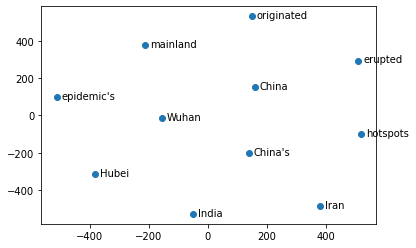

In [21]:
closestwords_tsneplot(model, 'China')

TSNE ile kelime vektörlerini grafikleştirmiş olduk. 

In [0]:
from nltk.probability import FreqDist
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

Matplotlib kütüphanesi yardımıyla verilerimize görsel olarak bakmaya başlayabiliriz. 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<FreqDist with 42326 samples and 1665545 outcomes>


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0, flags=flags)


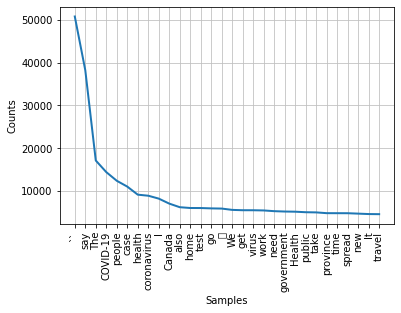

In [25]:
nltk.download('wordnet')
fix= WordNetLemmatizer()
lemma_speech = []
for x in filtered_words:
  lemma_speech.append(fix.lemmatize(x,'v'))
fdish =FreqDist(lemma_speech)
print(fdish)
fdish.most_common(5)
fdish.plot(30, cumulative =False)
plt.show()

Son olarak verilerimizi daha da basitleştirdik böylece makine öğrenme algoritmaları uygulayarak daha kolay öğrenilebiliriz. Bu işleme normalleştirme denir ve daha büyük veri kümeleriyle çalışırken önemlidir. Kısaca burada sadece CBC haber makalelerinden kelimeleri alıp temel formlarına indirgeyen kelimeleri grafikte gösterdik.